# **Traversing the US**

## [Riddler Classic, Jul 27, 2019](https://fivethirtyeight.com/features/can-you-escape-this-enchanted-maze/)

### solution by [Laurent Lessard](https://laurentlessard.com)

In [75]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

### List of states and all connected pairs

In [29]:
states = ["AL", "AZ", "AR", "CA", "CO", "CT", "DE", "FL",
          "GA", "ID", "IL", "IN", "IA", "KS", "KY", "LA",
          "ME", "MD", "MA", "MI", "MN", "MS", "MO", "MT",
          "NE", "NV", "NH", "NJ", "NM", "NY", "NC", "ND",
          "OH", "OK", "OR", "PA", "RI", "SC", "SD", "TN",
          "TX", "UT", "VT", "VA", "WA", "WV", "WI", "WY"]

pairs = [('AL', 'FL'), ('AL', 'GA'), ('AL', 'MS'), ('AL', 'TN'), ('AR', 'LA'),
         ('AR', 'MO'), ('AR', 'MS'), ('AR', 'OK'), ('AR', 'TN'), ('AR', 'TX'),
         ('AZ', 'CA'), ('AZ', 'CO'), ('AZ', 'NM'), ('AZ', 'NV'), ('AZ', 'UT'),
         ('CA', 'NV'), ('CA', 'OR'), ('CO', 'KS'), ('CO', 'NE'), ('CO', 'NM'),
         ('CO', 'OK'), ('CO', 'UT'), ('CO', 'WY'), ('CT', 'MA'), ('CT', 'NY'),
         ('CT', 'RI'), ('DE', 'MD'), ('DE', 'NJ'), ('DE', 'PA'), ('FL', 'GA'),
         ('GA', 'NC'), ('GA', 'SC'), ('GA', 'TN'), ('IA', 'IL'), ('IA', 'MN'),
         ('IA', 'MO'), ('IA', 'NE'), ('IA', 'SD'), ('IA', 'WI'), ('ID', 'MT'),
         ('ID', 'NV'), ('ID', 'OR'), ('ID', 'UT'), ('ID', 'WA'), ('ID', 'WY'),
         ('IL', 'IN'), ('IL', 'KY'), ('IL', 'MO'), ('IL', 'WI'), ('IN', 'KY'),
         ('IN', 'MI'), ('IN', 'OH'), ('KS', 'MO'), ('KS', 'NE'), ('KS', 'OK'),
         ('KY', 'MO'), ('KY', 'OH'), ('KY', 'TN'), ('KY', 'VA'), ('KY', 'WV'),
         ('LA', 'MS'), ('LA', 'TX'), ('MA', 'NH'), ('MA', 'NY'), ('MA', 'RI'),
         ('MA', 'VT'), ('MD', 'PA'), ('MD', 'VA'), ('MD', 'WV'), ('ME', 'NH'),
         ('MI', 'OH'), ('MI', 'WI'), ('MN', 'ND'), ('MN', 'SD'), ('MN', 'WI'),
         ('MO', 'NE'), ('MO', 'OK'), ('MO', 'TN'), ('MS', 'TN'), ('MT', 'ND'),
         ('MT', 'SD'), ('MT', 'WY'), ('NC', 'SC'), ('NC', 'TN'), ('NC', 'VA'),
         ('ND', 'SD'), ('NE', 'SD'), ('NE', 'WY'), ('NH', 'VT'), ('NJ', 'NY'),
         ('NJ', 'PA'), ('NM', 'OK'), ('NM', 'TX'), ('NM', 'UT'), ('NV', 'OR'),
         ('NV', 'UT'), ('NY', 'PA'), ('NY', 'VT'), ('OH', 'PA'), ('OH', 'WV'),
         ('OK', 'TX'), ('OR', 'WA'), ('PA', 'WV'), ('SD', 'WY'), ('TN', 'VA'),
         ('UT', 'WY'), ('VA', 'WV')]

In [253]:
# define the graph
G=nx.Graph()
G.add_nodes_from(states)
G.add_edges_from(pairs)

In [246]:
# function that plots the graph nicely and colors some of the nodes/edges.
def plotgraph( gnodes=[], gedges=[], savefile=True, label=0 ):
    # fetch kk layout
    layout = nx.kamada_kawai_layout(G)
    # rotate layout (in counterclockwise direction)
    t = 200 * np.pi/180
    R = np.array( [[np.cos(t), -np.sin(t)],[np.sin(t), np.cos(t)]] )
    xvals,yvals = [],[]
    for s in states:
        layout[s] = np.dot(R,layout[s])
        xvals.append( layout[s][0] )
        yvals.append( layout[s][1] )
    
    ncolors = []
    for n in G.nodes:
        if n in gnodes:
            ncolors.append('C2')  # SPECIAL COLOR
        else:
            ncolors.append('C0')  # DEFAULT COLOR
    
    ecolors = []
    for e in G.edges:
        if e in gedges or e[::-1] in gedges:
            ecolors.append('C2')
        else:
            ecolors.append('lightgray')
    

    plt.figure(figsize=(11,4.5))
    nx.draw(G, pos=layout, with_labels=True, node_size=700, node_shape='o',
               node_color=ncolors, edge_color=ecolors, width=2.5, font_color='white')

    # put tight padding border
    padding = 0.05
    plt.gca().set_axis_off()
    plt.gca().xaxis.set_major_locator(plt.NullLocator())
    plt.gca().yaxis.set_major_locator(plt.NullLocator())
    plt.axis( [min(xvals)-padding, max(xvals)+padding, min(yvals)-padding, max(yvals)+padding] )
    plt.tight_layout(pad=0)
    
    if savefile:
        plt.savefig("us_traverse_" + str(label).zfill(4) + ".png", bbox_inches='tight', pad_inches=0)

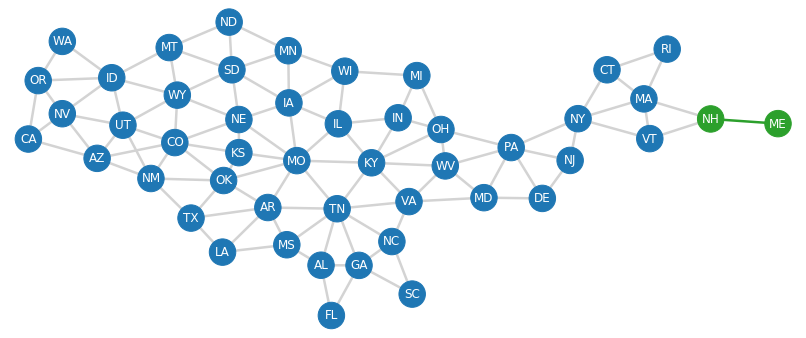

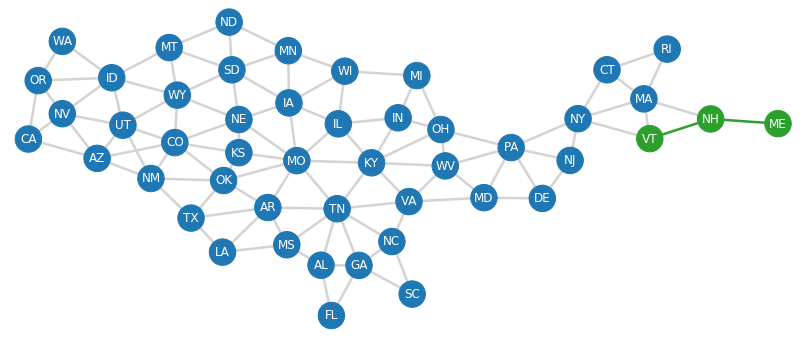

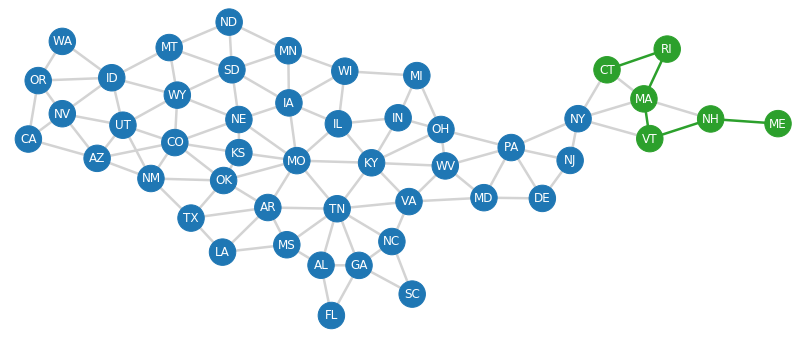

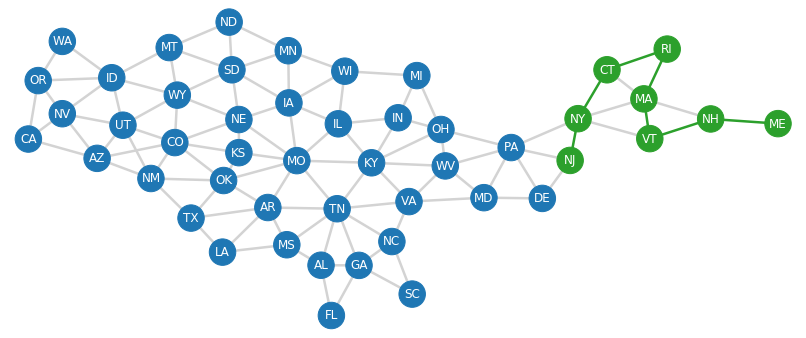

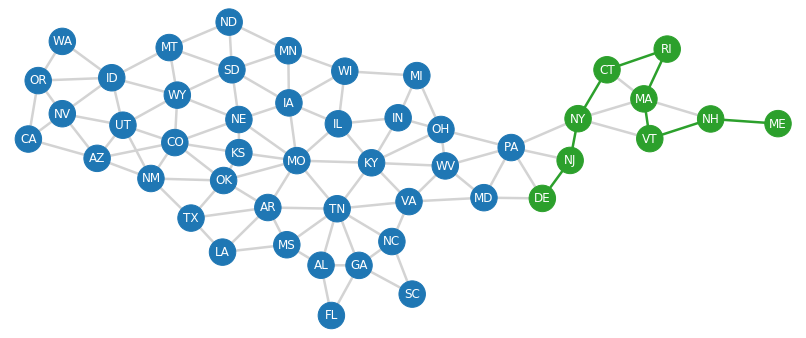

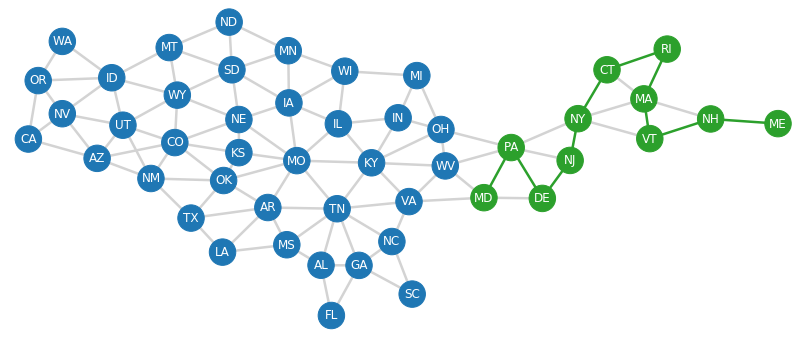

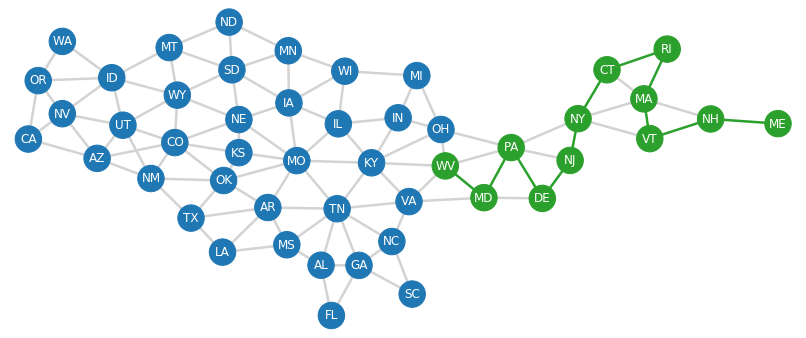

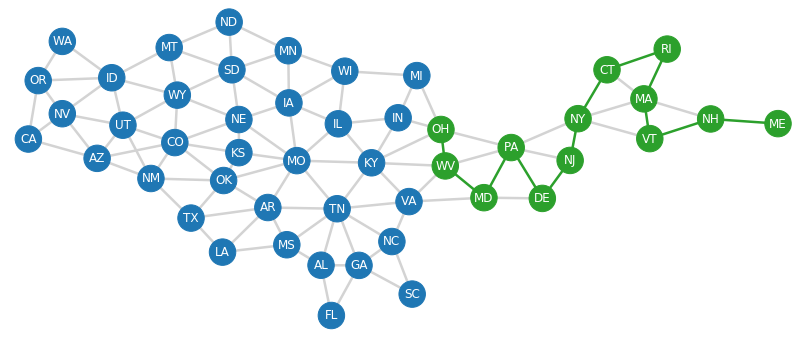

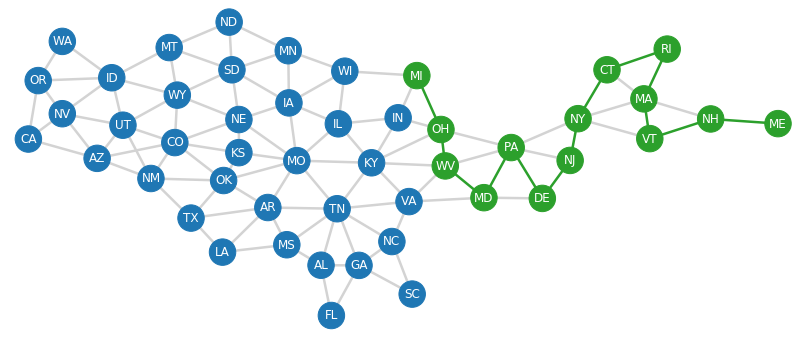

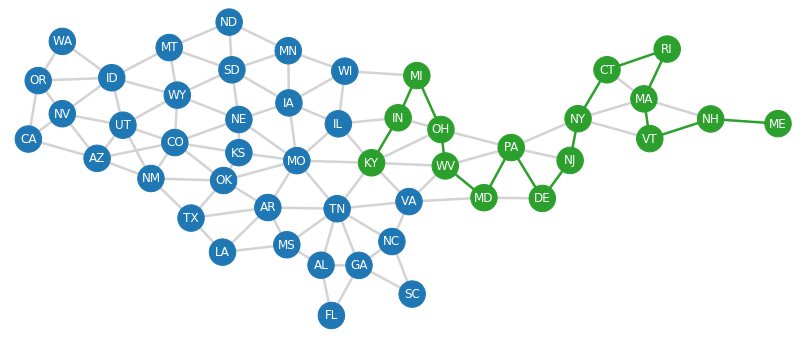

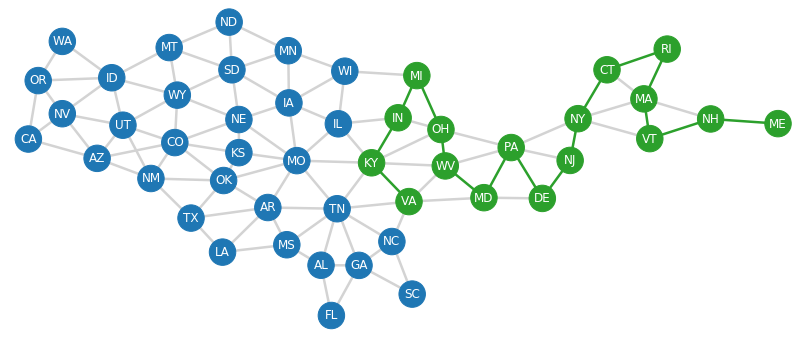

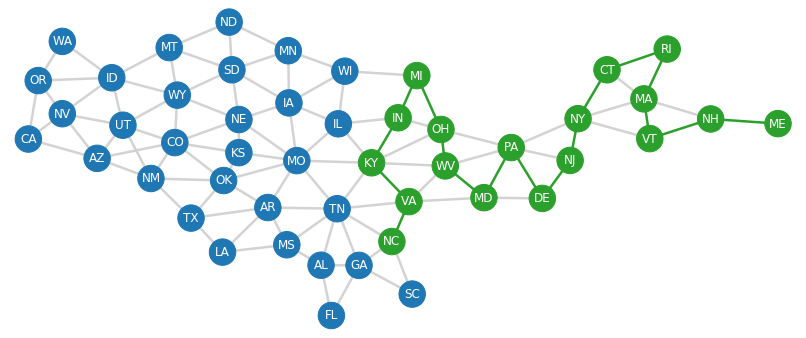

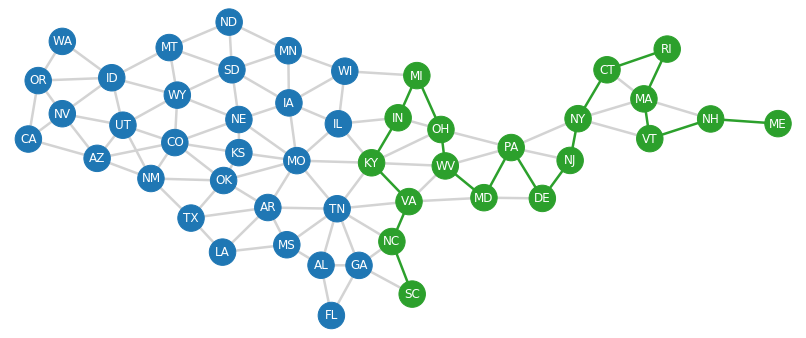

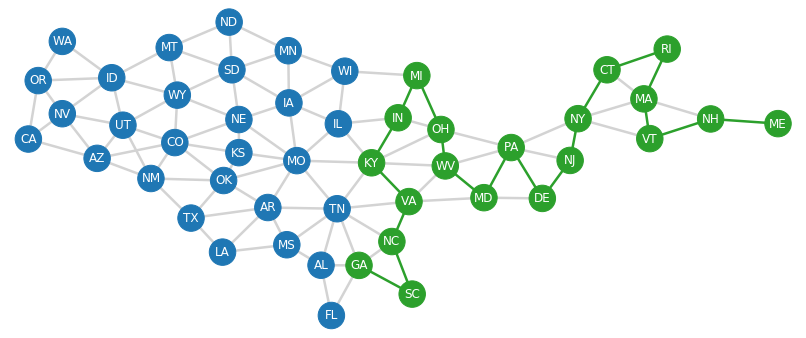

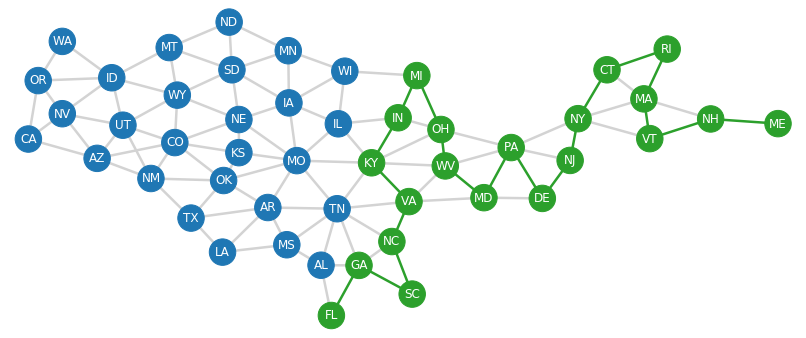

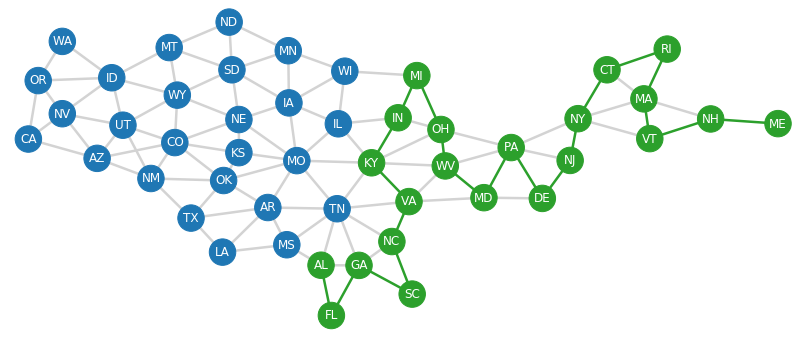

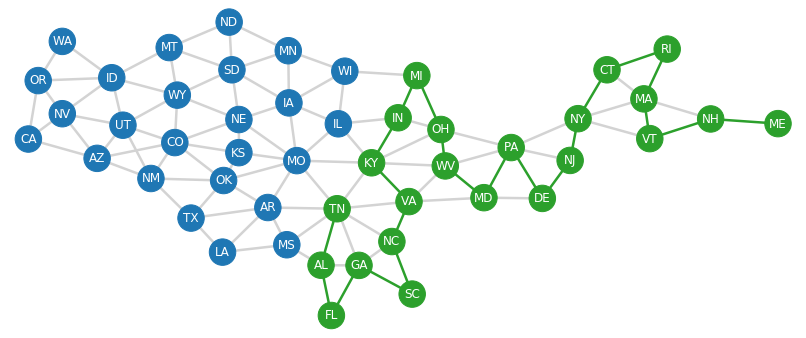

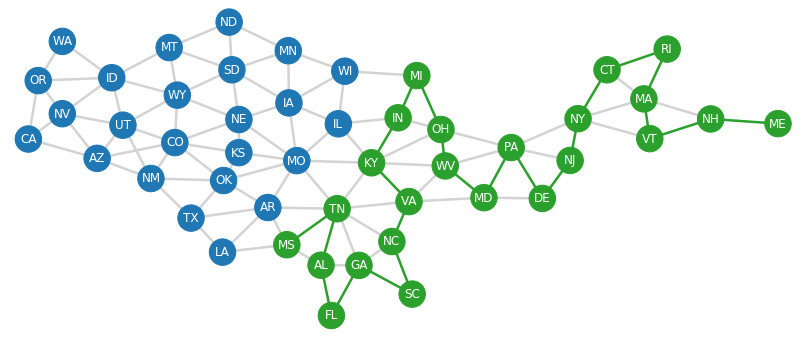

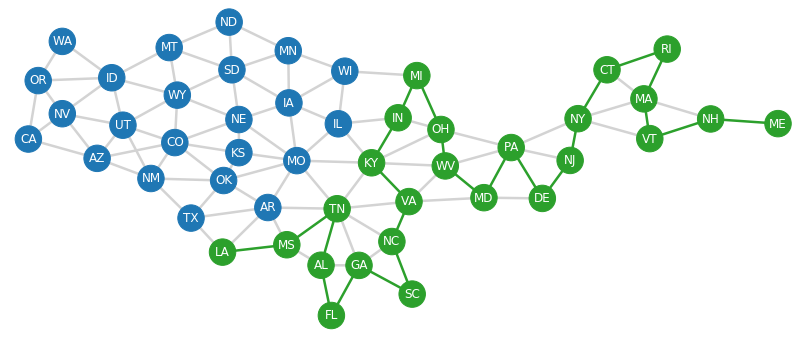

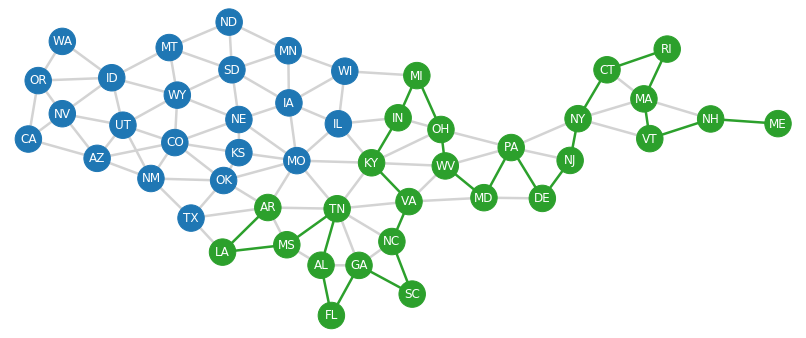

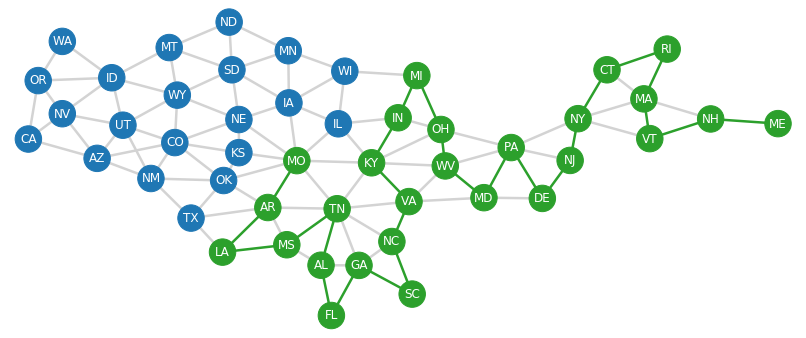

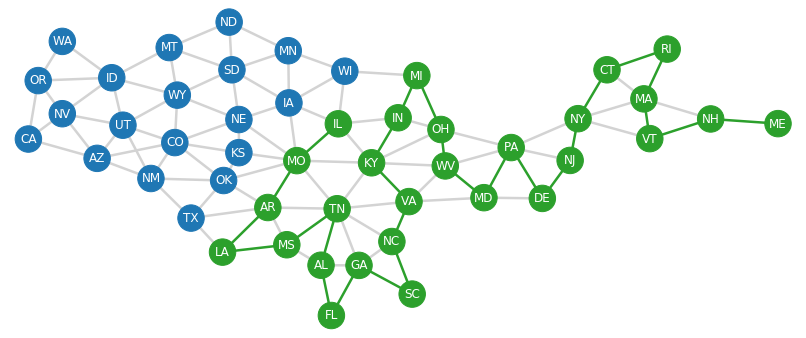

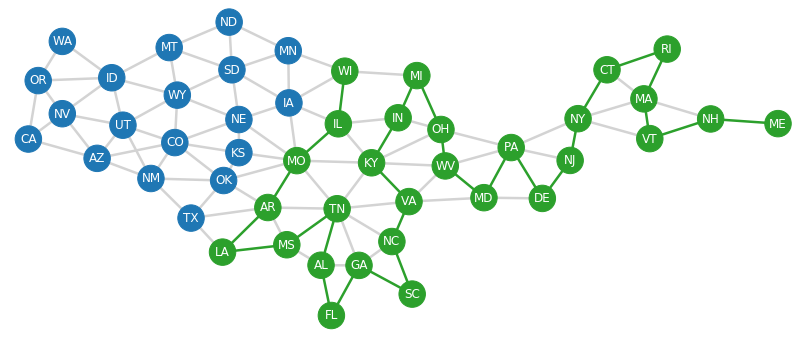

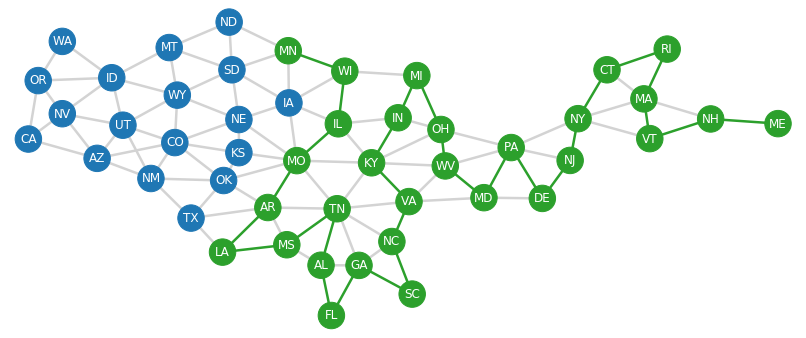

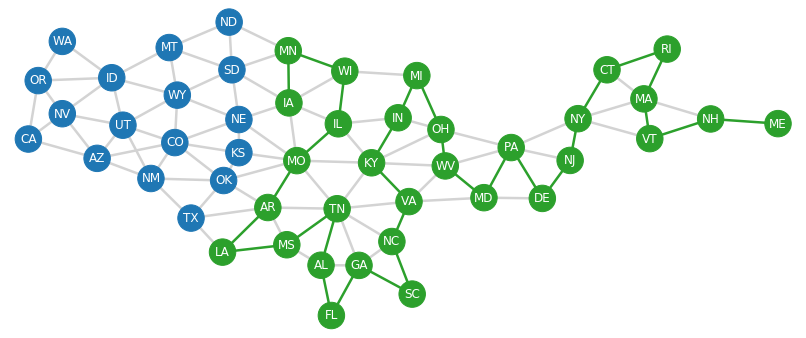

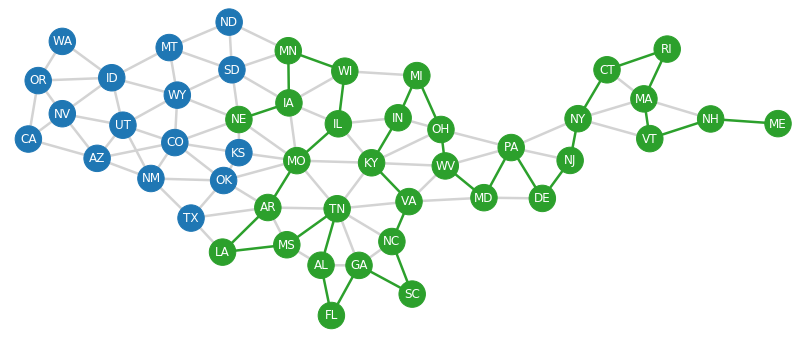

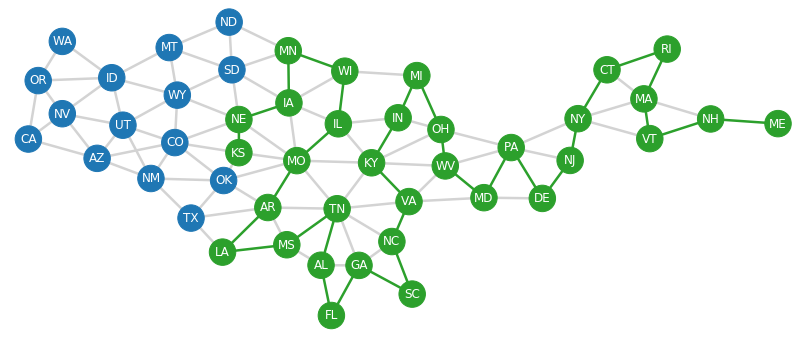

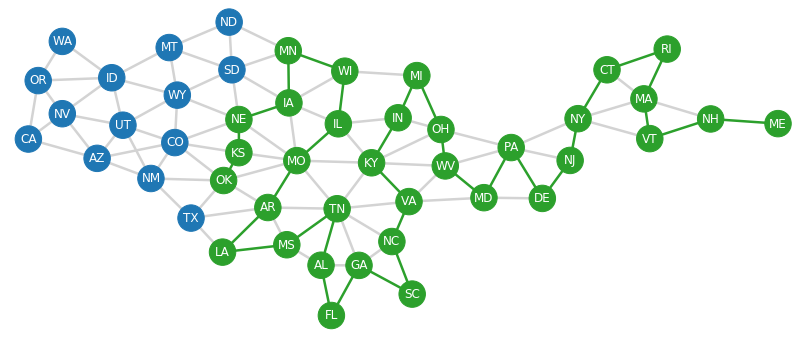

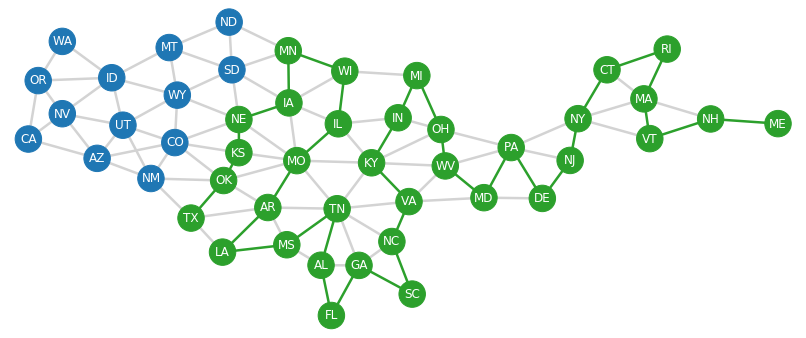

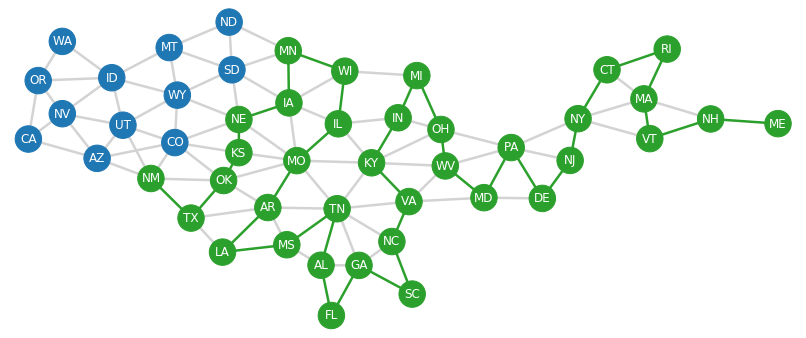

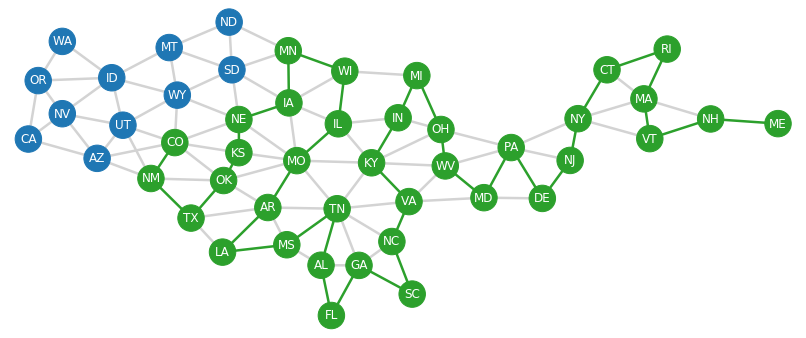

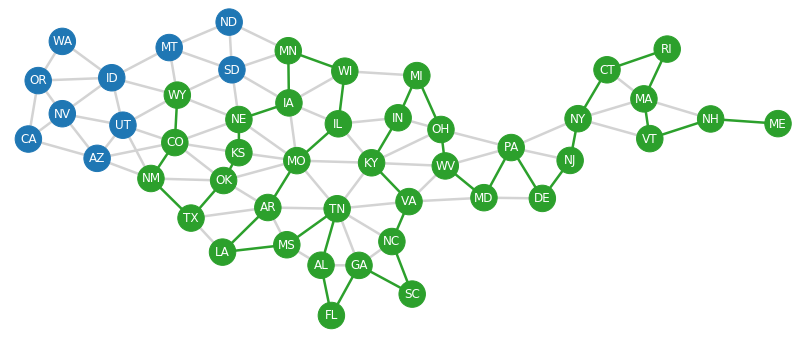

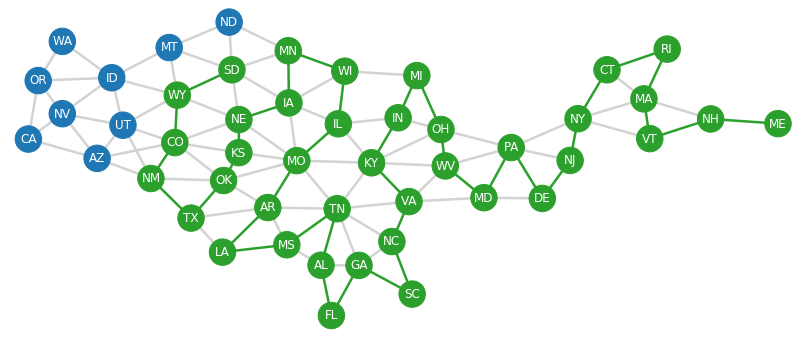

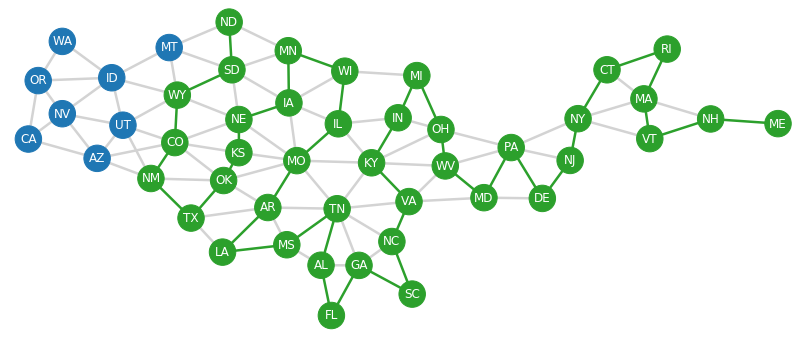

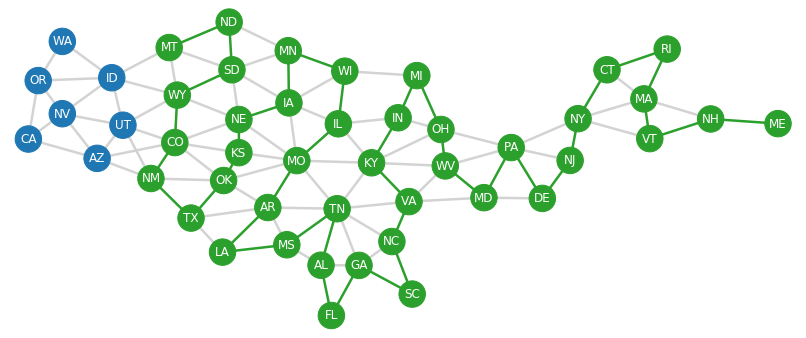

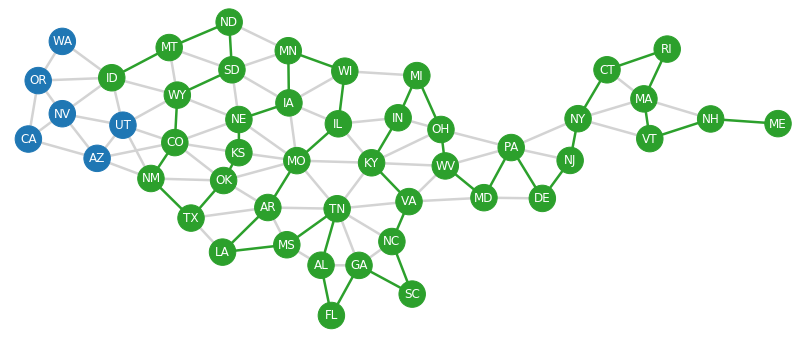

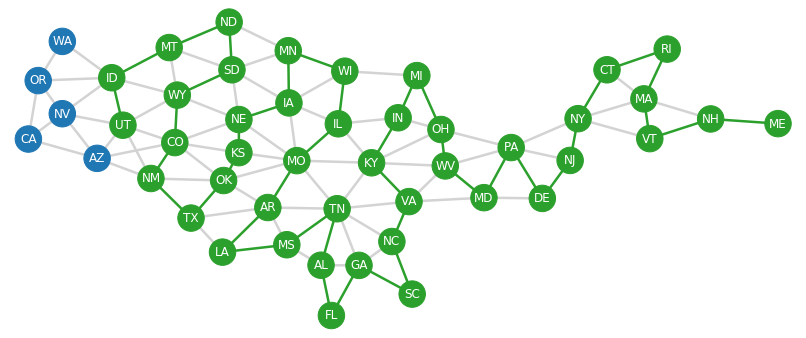

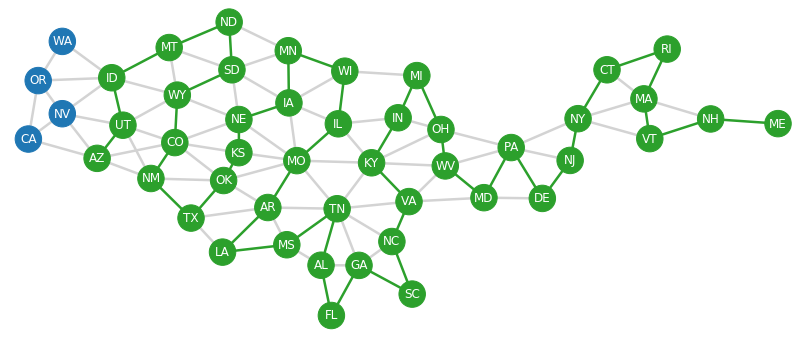

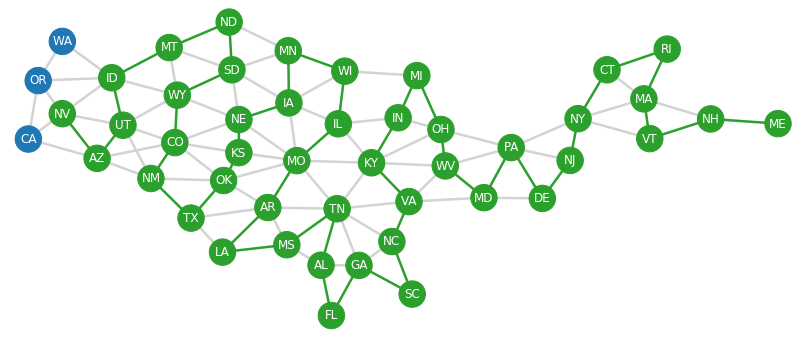

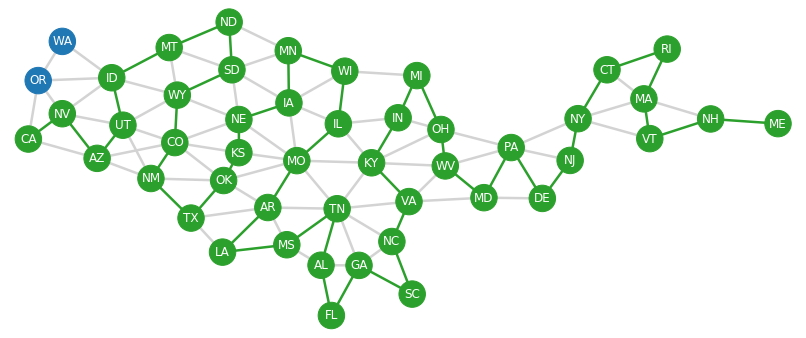

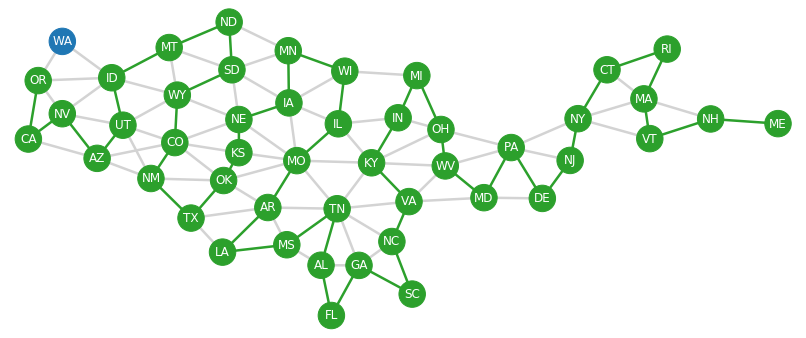

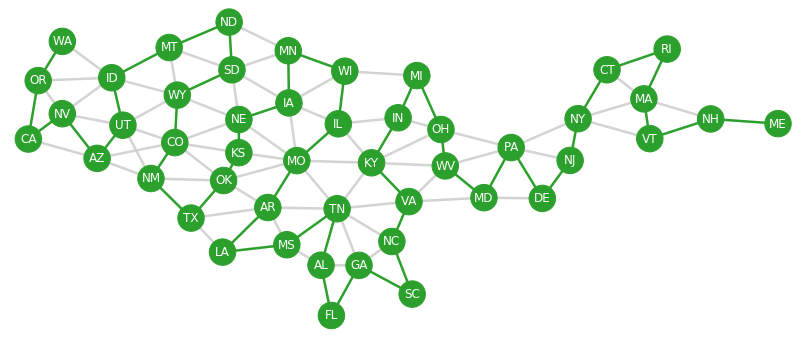

In [247]:
# Here is the order I picked. There are many solutions!
nord = ['ME','NH','VT','MA','RI','CT','NY','NJ',
        'DE','PA','MD','WV','OH','MI','IN','KY',
        'VA','NC','SC','GA','FL','AL','TN','MS',
        'LA','AR','MO','IL','WI','MN','IA','NE',
        'KS','OK','TX','NM','CO','WY','SD','ND',
        'MT','ID','UT','AZ','NV','CA','OR','WA']
n = len(nord)

eord = [ (nord[i-1],nord[i]) for i in range(1,n) ]
plotgraph(label=0)
plotgraph(gnodes=nord[0:1],label=1)
for i in range(1,n):
    plotgraph(gnodes=nord[0:i+1],gedges=eord[0:i],label=i+1)

Here is the result once the images generated above are assembled into a GIF:

![](./us_traverse_img/us_traverse.gif)